# Clustering

### Clustering is a type of unsupervised learning that allows us to find groups of similar objects, objects that are more related to each other than to the objects in other groups. This is often used when we don’t have access to the ground truth, in other words, the labels are missing.

#### NB: The goal of clustering is to separate the data into groups, or clusters, with more similar traits to each other than to the data in the other clusters.

## Kmeans

#### One of the most popular clustering algorithms is k-means. Assuming that there are n data points, the algorithm works as follows:

#### Step 1:initialization - pick k random points as cluster centers, called centroids
#### Step 2:cluster assignment - assign each data point to its nearest centroid based on its distance to each centroid, and that forms k clusters
#### Step 3:centroid updating - for each new cluster, calculate its centroid by taking the average of all the points assigned to the cluster
#### Step 4:repeat steps 2 and 3 until none of cluster assignments change, or it reaches the maximum number of iterations

In [2]:
from sklearn.cluster import KMeans

In [3]:
from sklearn.datasets import load_wine
wine=load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
import pandas as pd
import numpy as np
data=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


array([[<AxesSubplot:xlabel='alcohol', ylabel='alcohol'>,
        <AxesSubplot:xlabel='total_phenols', ylabel='alcohol'>],
       [<AxesSubplot:xlabel='alcohol', ylabel='total_phenols'>,
        <AxesSubplot:xlabel='total_phenols', ylabel='total_phenols'>]],
      dtype=object)

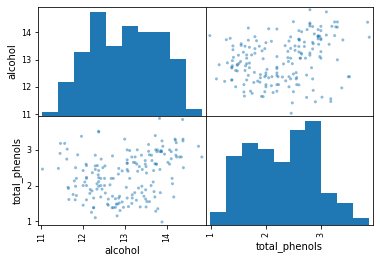

In [7]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(data.iloc[:,[0,5]])

#### choice two best columns

In [9]:
X = data[['alcohol', 'total_phenols']]

#### where x is the raw data, mean and std are the average and standard deviation of x, and z is the scaled x such that it is centered at 0 and it has a unit standard deviation

In [10]:
from sklearn.preprocessing import StandardScaler
# Intialize StandardScale Class
scale = StandardScaler()
# Learn means and std of dataset
scale.fit(X)

StandardScaler()

In [12]:
scale.mean_

array([13.00061798,  2.29511236])

In [13]:
scale.scale_

array([0.80954291, 0.62409056])

#### We must transform every data

In [14]:
X_scaled = scale.transform(X)

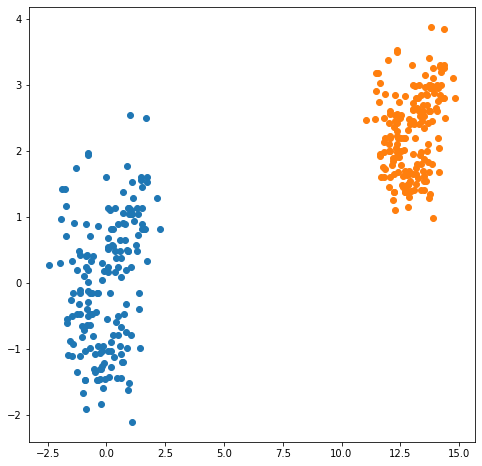

In [25]:
plt.figure(figsize=(8, 8))
plt.scatter(X_scaled[:,[0]], X_scaled[:,[1]])
plt.scatter(X.iloc[:,[0]], X.iloc[:,[1]])

In [16]:
X_scaled.mean(axis=0)

array([ 7.84141790e-15, -1.95536471e-16])

In [18]:
X_scaled.std(axis=0)

array([1., 1.])

### K-means Modeling

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

KMeans(n_clusters=3)

In [28]:
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2,
       0, 2, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0], dtype=int32)

#### To inspect the coordinates of the three centroids:

In [30]:
kmeans.cluster_centers_

array([[ 0.92017418,  0.87087204],
       [ 0.07498401, -1.14070754],
       [-1.06309124,  0.06418028]])

Text(0.5, 1.0, 'k-means (k=3)')

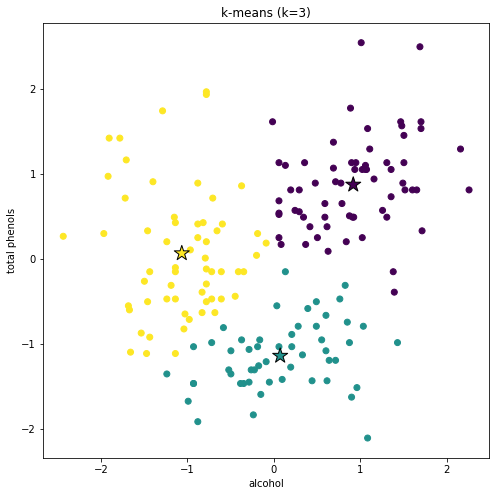

In [34]:
plt.figure(figsize=(8, 8))

# Plot the scaled data
plt.scatter(
    X_scaled[:,0],
    X_scaled[:,1],
    c=kmeans.predict(X_scaled)
)

# Identified the centroids
plt.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    marker="*",
    s=250,
    c=[0,1,2],
    edgecolors='k'
)
plt.xlabel("alcohol")
plt.ylabel('total phenols')
plt.title('k-means (k=3)')

In [36]:
X_new = np.array([[13, 2.5]])

In [40]:
X_new_scaled = scale.transform(X_new)
X_new_scaled

/home/gilles/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.00076337,  0.32829793]])

In [41]:
kmeans.predict(X_new_scaled)

array([0], dtype=int32)

In [42]:
kmeans.inertia_

114.34674038310786

### Optimal k: The Elbow Method

Text(0, 0.5, 'Inertia')

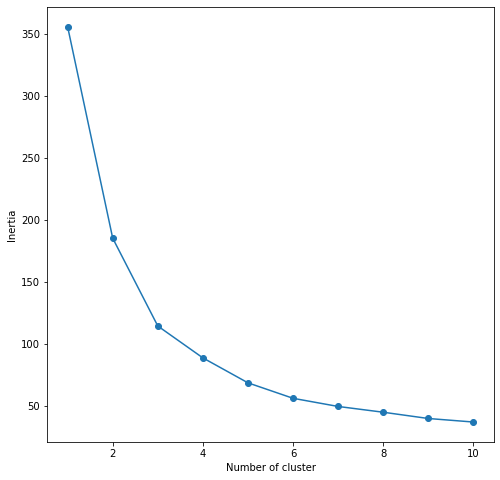

In [44]:
inertia = []

for i in range(1, 11):
    knn = KMeans (n_clusters = i)
    knn.fit(X_scaled)
    inertia.append(knn.inertia_)
    
plt.figure(figsize=(8, 8))
    
plt.plot(np.arange(1, 11), inertia, marker='o')
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")

In [49]:
scale_final = StandardScaler()
scale_final.fit(data)
X_final = scale_final.transform(data)

Text(0, 0.5, 'Inertia')

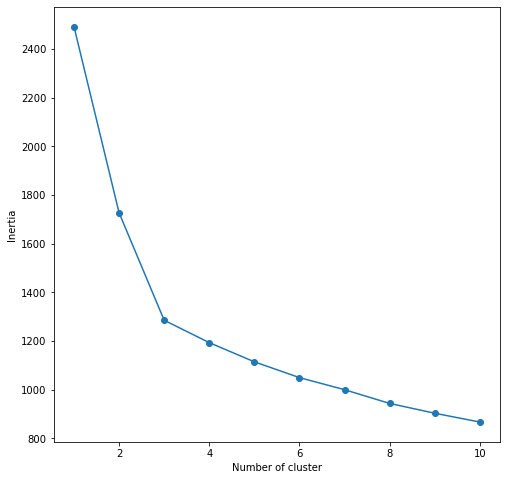

In [50]:
inertia = []

for i in range(1, 11):
    knn = KMeans(n_clusters = i)
    knn.fit(X_final)
    inertia.append(knn.inertia_)
    
plt.figure(figsize=(8, 8))
    
plt.plot(np.arange(1, 11), inertia, marker='o')
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")